In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime
warnings.filterwarnings('ignore')

# Setup Seaborn
sns.set_style("whitegrid")

In [2]:
#Read file into a DataFrame and print head.
xword_data = pd.ExcelFile('../data/NYT_XWord_data.xlsx', engine='openpyxl')
print(xword_data.sheet_names)

['Sheet1']


In [3]:
df1 = xword_data.parse('Sheet1')

In [4]:
df1.head(35)

,Puzzle_Date,Completed_Date (IS1),Completed_Date (IS2),Day_of_Week,Time (s) (IS1),Time (s) (IS2),Global_Median_Solver_Time(s),Difficulty,Median_Solver%_AVG_PM,Grid Size,...,90_180_Rot_Sym,LR_UD_Sym,Diag_Sym,Black_Square_Fill,Outside_Grid,Unchecked_Sq,Uniclue,Duplicate_Answers,Quantum,Wordplay
0,2024-01-31,2024-01-31 07:40:02,NaT,Wednesday,373.0,NaN,587,Average,-12,1,...,0,0,0,0,0,0,0,0,0,5.0
1,2024-01-30,2024-01-30 08:24:08,2024-01-30 19:28:43,Tuesday,330.0,417.0,435,Average,-8,1,...,0,0,0,0,0,0,0,0,0,2.0
2,2024-01-29,2024-01-29 09:11:22,2024-01-29 12:04:17,Monday,294.0,242.0,364,Hard,3,1,...,0,0,0,0,0,0,0,0,0,0.0
3,2024-01-28,2024-01-28 08:20:36,2024-01-28 19:02:16,Sunday,983.0,1710.0,1791,Average,-5,2,...,0,0,0,0,0,0,0,0,0,4.0
4,2024-01-27,2024-01-27 07:26:30,2024-01-27 19:30:40,Saturday,565.0,1379.0,1244,Average,-11,1,...,0,0,0,0,0,0,0,0,0,4.0
5,2024-01-26,2024-01-26 07:27:18,2024-01-26 13:25:05,Friday,632.0,636.0,793,Very Easy,-34,1,...,0,0,0,0,0,0,0,0,0,6.0
6,2024-01-25,2024-01-25 07:17:58,2024-01-25 18:55:28,Thursday,808.0,1295.0,1096,Hard,9,1,...,0,0,0,0,0,0,0,0,0,7.0
7,2024-01-24,2024-01-24 06:48:01,2024-01-24 18:11:25,Wednesday,313.0,582.0,550,Very Easy,-30,1,...,0,0,0,0,0,0,0,0,0,7.0
8,2024-01-23,2024-01-23 06:53:25,2024-01-23 14:05:58,Tuesday,259.0,376.0,381,Easy,-22,1,...,0,0,0,0,0,0,0,0,0,0.0
9,2024-01-22,2024-01-22 08:09:11,2024-01-21 18:26:08,Monday,348.0,428.0,376,Hard,6,1,...,0,0,0,0,0,0,0,0,0,0.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Puzzle_Date                   2222 non-null   datetime64[ns]
 1   Completed_Date (IS1)          1178 non-null   datetime64[ns]
 2   Completed_Date (IS2)          1095 non-null   datetime64[ns]
 3   Day_of_Week                   2222 non-null   object        
 4   Time (s) (IS1)                1178 non-null   float64       
 5   Time (s) (IS2)                1095 non-null   float64       
 6   Global_Median_Solver_Time(s)  2222 non-null   int64         
 7   Difficulty                    2222 non-null   object        
 8   Median_Solver%_AVG_PM         2222 non-null   int64         
 9   Grid Size                     2222 non-null   int64         
 10  No_Constructors               2222 non-null   int64         
 11  Constructors(by seniority)    

In [6]:
# Delete weird columns at the back end of the imported data
#df1 = df1.drop(columns=df1.columns[-26:], axis=1)

In [7]:
#Include only 2020-2024 (test version)
#df1['P_Yr'] = df1['Puzzle_Date'].dt.to_period('Y')
#df1 = df1.loc[(df1["P_Yr"] == "2020") | (df1["P_Yr"] == "2021") | (df1["P_Yr"] == "2022") | (df1["P_Yr"] == "2023") | (df1["P_Yr"] == "2024")]

In [8]:
#df1 = df1.loc[(df1["Day_of_Week"] != "Sunday")]

In [9]:
# A numerical column for puzzle day that starts with Sunday and ends with Saturday
df1.loc[(df1["Day_of_Week"] == "Sunday"), "Day_of_Week_num"] = 1 
df1.loc[(df1["Day_of_Week"] == "Monday"), "Day_of_Week_num"] = 2
df1.loc[(df1["Day_of_Week"] == "Tuesday"), "Day_of_Week_num"] = 3
df1.loc[(df1["Day_of_Week"] == "Wednesday"), "Day_of_Week_num"] = 4
df1.loc[(df1["Day_of_Week"] == "Thursday"), "Day_of_Week_num"] = 5
df1.loc[(df1["Day_of_Week"] == "Friday"), "Day_of_Week_num"] = 6
df1.loc[(df1["Day_of_Week"] == "Saturday"), "Day_of_Week_num"] = 7

In [10]:
df1 = df1.sort_values(by=['Day_of_Week_num'], ascending = False)

In [11]:
df_labels = df1.copy()
#df_labels.head()

In [12]:
df_PCA = df1.copy()

In [13]:
# Pare down to columns potentially useful for PCA
df_PCA = df_PCA[['Words', 'Blocks', 'Unused_Letters', 'Spans', 'Stacks', 'Unique_Answers',
                'Rebus_Count', 'Rebus_Unique', 'Cheater_Squares', 'AWL', 'Scrabble_Score', 'Scrabble_Avg', 'FITB', 'Cross_Ref_Clues', 'Scrabble_Illegal',
                 'Open_Squares', 'Freshness_Factor', 'Overall_Freshness%', 'Duplicate_Clues', 'Circle_Count', 'Shade_Count', 'Unusual_Sym']]

In [14]:
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222 entries, 221 to 801
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Words               2222 non-null   int64  
 1   Blocks              2222 non-null   int64  
 2   Unused_Letters      2222 non-null   int64  
 3   Spans               2222 non-null   int64  
 4   Stacks              2222 non-null   int64  
 5   Unique_Answers      2222 non-null   int64  
 6   Rebus_Count         2222 non-null   int64  
 7   Rebus_Unique        2222 non-null   int64  
 8   Cheater_Squares     2222 non-null   int64  
 9   AWL                 2222 non-null   float64
 10  Scrabble_Score      2086 non-null   float64
 11  Scrabble_Avg        2222 non-null   float64
 12  FITB                2222 non-null   int64  
 13  Cross_Ref_Clues     2222 non-null   int64  
 14  Scrabble_Illegal    2222 non-null   int64  
 15  Open_Squares        2222 non-null   int64  
 16  Fresh

In [15]:
#Impute missing values in "Scrabble_Score"
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_PCA["Scrabble_Score"] = imputer.fit_transform(df_PCA["Scrabble_Score"].values.reshape(-1,1))[:,0]

In [16]:
#Transform features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df_PCA)

In [17]:
#Instantiate PCA object
from sklearn.decomposition import PCA

In [18]:
#Fit and transform
principal = PCA(n_components=4)
x = principal.fit_transform(scaled_df)

In [19]:
#How much variance is explained by each principal component?
print(principal.explained_variance_ratio_)
print(principal.explained_variance_ratio_.cumsum())

[0.24759511 0.14457748 0.08364096 0.07024409]
[0.24759511 0.39217259 0.47581355 0.54605765]


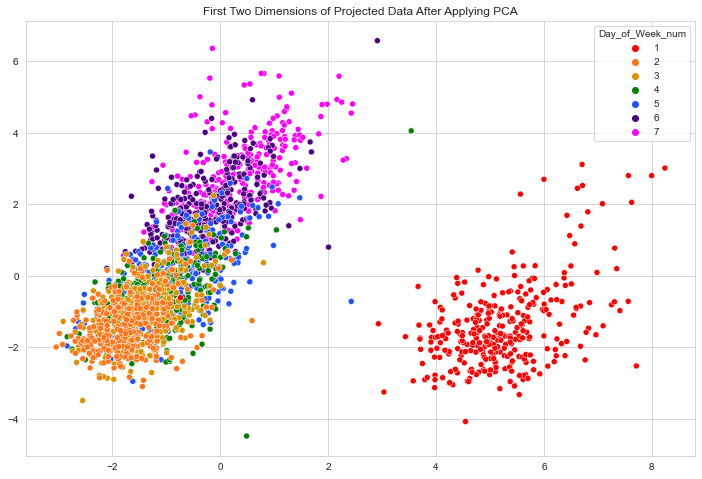

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x[:, 0], x[:, 1], hue=df_labels["Day_of_Week_num"], palette=["red","#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order = [1,2,3,4,5,6,7])
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

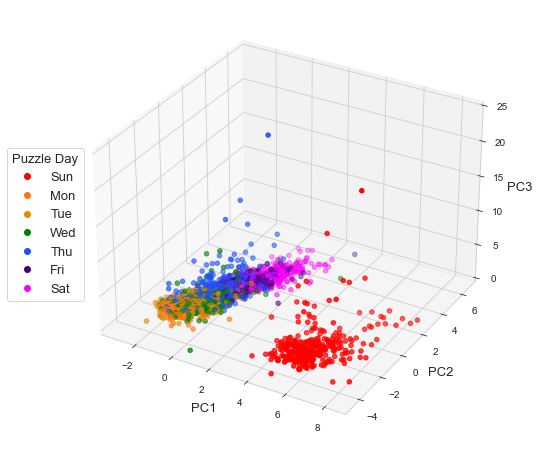

In [21]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import BoundaryNorm, ListedColormap
fig = plt.figure(figsize=(8,8))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
cmap = ListedColormap(["red","#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"])

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
plotty = axis.scatter(x[:,0],x[:,1],x[:,2], c=df_labels['Day_of_Week_num'],cmap=cmap)
axis.set_xlabel("PC1", fontsize=13)
axis.set_ylabel("PC2", fontsize=13)
axis.set_zlabel("PC3", fontsize=13)
axis.set_zlim(0,25)

labels = np.unique(df_labels['Day_of_Week_num'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=plotty.cmap(plotty.norm(yi))) for yi in labels]
labels=["Sun", "Mon", "Tue", "Wed","Thu","Fri","Sat"]
plt.legend(handles, labels, loc="center right", bbox_to_anchor=(.05, 0.5), title="Puzzle Day", fontsize=13, title_fontsize=13)


### Distributions of Global Median Solve Times Per Puzzle Day

In [22]:
#df1 = xword_data.parse('Sheet1')

In [23]:
# Convert global median solve times per puzzle to minutes and drop times in seconds
df1["GMST(m)"] = df1["Global_Median_Solver_Time(s)"]/60  #GMST = Global Median solve times
df1.drop(['Global_Median_Solver_Time(s)'], axis=1, inplace=True)

In [24]:
# It will be useful to have year of puzzle issue in a separate column for analysis below
df1['P_Yr'] = df1['Puzzle_Date'].dt.to_period('Y')
df1['P_Yr'].value_counts()

2020    366
2023    365
2021    365
2019    365
2022    365
2018    365
2024     31
Freq: A-DEC, Name: P_Yr, dtype: int64

In [25]:
# Filter year range as desired
#df1_recent = df1.loc[(df1["P_Yr"] == "2020") | (df1["P_Yr"] == "2021") | (df1["P_Yr"] == "2022") | (df1["P_Yr"] == "2023") | (df1["P_Yr"] == "2024")]
df1_recent = df1.loc[(df1["P_Yr"] == "2018") | (df1["P_Yr"] == "2019") | (df1["P_Yr"] == "2020") | (df1["P_Yr"] == "2021") | (df1["P_Yr"] == "2022") | (df1["P_Yr"] == "2023") | (df1["P_Yr"] == "2024")]

In [26]:
df1_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222 entries, 221 to 801
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Puzzle_Date                   2222 non-null   datetime64[ns]
 1   Completed_Date (IS1)          1178 non-null   datetime64[ns]
 2   Completed_Date (IS2)          1095 non-null   datetime64[ns]
 3   Day_of_Week                   2222 non-null   object        
 4   Time (s) (IS1)                1178 non-null   float64       
 5   Time (s) (IS2)                1095 non-null   float64       
 6   Difficulty                    2222 non-null   object        
 7   Median_Solver%_AVG_PM         2222 non-null   int64         
 8   Grid Size                     2222 non-null   int64         
 9   No_Constructors               2222 non-null   int64         
 10  Constructors(by seniority)    2222 non-null   object        
 11  1st_Constructor              

In [27]:
# A numerical column for puzzle day that starts with Sunday and ends with Saturday
df1_recent.loc[(df1_recent["Day_of_Week"] == "Sunday"), "DOW_num"] = 1 
df1_recent.loc[(df1_recent["Day_of_Week"] == "Monday"), "DOW_num"] = 2
df1_recent.loc[(df1_recent["Day_of_Week"] == "Tuesday"), "DOW_num"] = 3
df1_recent.loc[(df1_recent["Day_of_Week"] == "Wednesday"), "DOW_num"] = 4
df1_recent.loc[(df1_recent["Day_of_Week"] == "Thursday"), "DOW_num"] = 5
df1_recent.loc[(df1_recent["Day_of_Week"] == "Friday"), "DOW_num"] = 6
df1_recent.loc[(df1_recent["Day_of_Week"] == "Saturday"), "DOW_num"] = 7

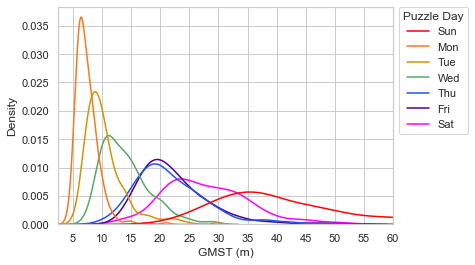

In [28]:
# Density plot of GMS Times in overall time range (2018-2024)
df1_recent['plot_seq_map'] = df1_recent['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_recent, x = "GMST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 60)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax.set_xlabel("GMST (m)")
plt.show()

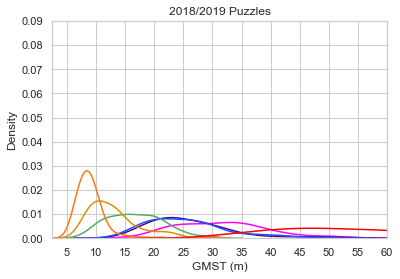

In [29]:
# Density Plot for 2018-2019 Only (for IS1 and IS2 Intros)
df1_recent_1 = df1_recent.loc[(df1["P_Yr"] == "2018") | (df1["P_Yr"] == "2019")]

df1_recent_1['plot_seq_map'] = df1_recent_1['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_recent_1, x = "GMST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 60)
plt.ylim(0, .09)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('2018/2019 Puzzles')
ax.set_xlabel("GMST (m)")
plt.show()

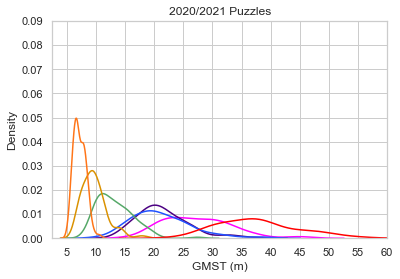

In [30]:
# Density Plot for 2020-2021 Only (for IS1 and IS2 Intros)
df1_recent_2 = df1_recent.loc[(df1["P_Yr"] == "2020") | (df1["P_Yr"] == "2021")]

df1_recent_2['plot_seq_map'] = df1_recent_2['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_recent_2, x = "GMST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 60)
plt.ylim(0, .09)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('2020/2021 Puzzles')
ax.set_xlabel("GMST (m)")
plt.show()

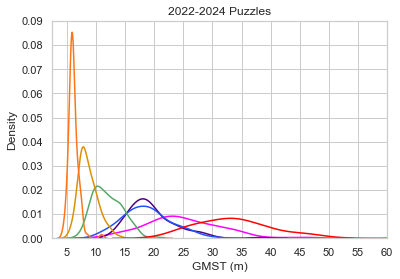

In [31]:
# Density Plot for 2022-2024 Only (for IS1 and IS2 Intros)
df1_recent_3 = df1_recent.loc[(df1_recent["P_Yr"] == "2022") | (df1["P_Yr"] == "2023") | (df1["P_Yr"] == "2024")]

df1_recent_3['plot_seq_map'] = df1_recent_3['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_recent_3, x = "GMST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 60)
plt.ylim(0, .09)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('2022-2024 Puzzles')
ax.set_xlabel("GMST (m)")
plt.show()